<h1 style="text-align:center">Deep Learning  Lab Session </h1>
<h1 style="text-align:center">First Lab Session - 3 Hours </h1>
<h1 style="text-align:center">Artificial Neural Networks for Handwritten Digits Recognition</h1>

<div class="alert alert-info">
<b> Student 1:</b> Daniele Reda
<br>
<b> Student 2:</b> Matteo Romiti
</div> 
 
The aim of this session is to practice with Artificial Neural Networks. Answers and experiments should be made by groups of one or two students. Each group should fill and run appropriate notebook cells. 

To generate your final report, use print as PDF (Ctrl+P). Do not forget to run all your cells before generating your final report and do not forget to include the names of all participants in the group. The lab session should be completed by April 7th 2017. 

# Introduction


In this session, your will implement, train and test a Neural Network
for the Handwritten Digits Recognition problem <a href="http://yann.lecun.com/exdb/mnist/"> [1] </a> with  different settings of hyper parameters. You will use the MNIST dataset which was constructed from a number of scanned document dataset available from the National Institute of Standards and Technology (NIST). Images of digits were taken from a variety of scanned documents, normalized in size and centered. 


<img src="Nimages/mnist.png",width="350" height="500" align="center">
<center><span>Figure 1: MNIST digits examples</span></center>


This assignment includes a written part of programs to help you understand how to build and train
your neural net and then to test your code and get restults. 

1. <a href="NeuralNetwork.py"> NeuralNetwork.py </a> 
2. <a href="transfer_functions.py"> transfer_functions.py </a> 
3.  <a href="utils.py "> utils.py </a> 


Functions defined inside the python files mentionned above can be imported  using the python command : 
from filename import *

You will use the following libraries:

1. <a href="http://cs231n.github.io/python-numpy-tutorial/"> numpy </a>: for creating arrays and using methods to manipulate arrays.

2. <a href="http://matplotlib.org/"> matplotlib  </a>: for making plots
 








# Section 1 :  My First Neural Network

<b>Part 1</b>: Before designing and writing your code, you will first work on a neural network by hand. 
Consider the above Neural network with two inputs $X=(x1,x2)$, one hidden layers and a single output unit $(y)$.
The initial weights are set to random values. Neurons 6 and 7 represent the bias. Bias values are equal to 1.  
Training sample, X = (0.8, 0.2), whose class label is Y=0.4.

Assume that the neurons have a Sigmoid activation function  $f(x)=\frac{1}{(1+e^{-x})}$ and the learning rate $\mu$=1


<img src="Nimages/NN.png", width="700" height="900"> 
<center><span>Figure 2: Neural network </span></center>
<br><br>
<div class="alert alert-warning">
<b>Question 1.1.1</b>: Compute the new values of weights $w_{i,j}$ after a forward pass and a backward pass.
$w_{i,j}$ is the weight of the connexion between neuron $i$ and neuron $j$.
</div>

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# input layer is layer 1, hidden layer is layer 2, output layer is layer 3
from __future__ import print_function
from transfer_functions import *  

#initializing values
y = 0.4
o11 = 0.8 # oij is the output from neuron in layer i in 'row' j
o12 = 0.2
o13 = 1
w13 = 0.3 # wij is the weight from neuron i to neuron j, numbered as in the figure
w23 = 0.8
w14 = -0.5
w24 = 0.2
w63 = 0.2
w64 = -0.4

#computing activations
u21 = w13*o11 + w23*o12 + w63*o13 # uij is the activation function in neuron in layer i in 'row' j
u22 = w14*o11 + w24*o12 + w64*o13
#passing activations through transfer function
o21 = sigmoid(u21)
o22 = sigmoid(u22)

o23 = 1
#o23 = sigmoid(1) we don't pass the bias through the transfer function
w35 = -0.6
w45 = 0.4
w75 = 0.5
u31 = w35*o21 + w45*o22 + w75*o23
y_ = sigmoid(u31)
print("the output of the feedforward algorithm is:\n", y_)

dEdu31 = (y_ - y)*(y_*(1-y_)) # error w.r.t. output layer
#print(dEdu31)
dEdu21 = (dEdu31*w35)*(o21*(1-o21)) # error w.r.t. hidden layer neuron 1
#print(dEdu21)
dEdu22 = (dEdu31*w45)*(o22*(1-o22)) # error w.r.t. hidden layer neuron 2
#print(dEdu22)

lambda_ = 1 #learning rate
#computing weight updates for the different neurons
w13 -= lambda_*dEdu21*o11
w23 -= lambda_*dEdu21*o12
w14 -= lambda_*dEdu22*o11
w24 -= lambda_*dEdu22*o12
w35 -= lambda_*dEdu31*o21
w45 -= lambda_*dEdu31*o22
w75 -= lambda_*dEdu31*o23
w63 -= lambda_*dEdu21*o13 
w64 -= lambda_*dEdu22*o13
#printing the new updates after the backpropagation algorithm
print("\nthe new weights after the backpropagation algorithms are:")
print ('w13', w13,'\nw14', w14,'\nw23', w23,'\nw24', w24,'\nw63', w63,'\nw64', w64,'\nw35', w35,'\nw45', w45, '\nw75', w75) 

the output of the feedforward algorithm is:
 0.55972959911

the new weights after the backpropagation algorithms are:
w13 0.304322654322 
w14 -0.502734731019 
w23 0.801080663581 
w24 0.199316317245 
w63 0.205403317903 
w64 -0.403418413773 
w35 -0.625414675063 
w45 0.387457272178 
w75 0.460637455535


<b>Part 2</b>: Neural Network Implementation

Please read all source files carefully and understand the data structures and all functions.
You are to complete the missing code. 
First you should define the neural network (using the NeuralNetwork class, see in the <a href="NeuralNetwork.py"> NeuralNetwork.py </a> file) and reinitialise weights. 
Then you will have to complete the Feed Forward and the Back-propagation functions. 
<br><br>
<div class="alert alert-warning"><b>Question 1.2.1</b>: Define the neural network corresponding to the one in part 1</div>

In [3]:
from NeuralNetwork import *
#create the network
nIter = 10
lambda_ = 1
input_layer_size = 2
hidden_layer_size = 2
output_layer_size = 1
my_first_net = NeuralNetwork(input_layer_size, hidden_layer_size, output_layer_size, nIter, lambda_)

In [4]:
#Data preparation 
X=[0.8,0.2]
Y=[0.4]
data=[]
data.append(X)
data.append(Y)

#initialize weights
wi=np.array([[0.3,-0.5],[0.8,0.2],[0.2,-0.4]])
wo=np.array([[-0.6],[0.4],[0.5]])
my_first_net.weights_initialisation(wi,wo)


<div class="alert alert-warning"><b>Question 1.2.2</b>: Implement the Feed Forward function (feedForward(X) in the NeuralNetwork.py file)</div>



<div class="alert alert-info">
#Implement it in the NeuralNetwork.py file and when finalised copy and paste your FeedForward function here
<pre><code>def feedForward(self, inputs):
    #array of inputs, we append the bias that is 1
    self.a_input = np.append(inputs, [1])

    #we pass the inputs times the weights to the transfer function
    self.a_hidden = np.append(self.transferFunc(self.a_input.dot(self.W_input_to_hidden)), [1])

    #compute what arrives at the output layer
    self.a_output = self.a_hidden.dot(self.W_hidden_to_output)

    #pass this to the transfer function to get the output of the network
    self.o_output = self.transferFunc(self.a_output)

    return self.o_output
</code></pre>
</div>

Check your network outputs the expected value (the one you computed in question 1.1)

In [5]:
#test my  Feed Forward function 
my_first_net.feedForward(X)
print("output = ", my_first_net.o_output)
print("difference = ", my_first_net.o_output - y_)

output =  [ 0.5597296]
difference =  [ 0.]


<div class="alert alert-warning"><b>Question 1.2.3</b>: Implement the Back-propagation Algorithm (backPropagate(Y) in the NeuralNetwork.py file)</div>


<div class="alert alert-info">
# Implement it in the NeuralNetwork.py file and when finalised copy and paste your backPropagate function here
<pre><code>def backPropagate(self, targets):
    # calculate error terms for output
    self.outputErrors = self.o_output - targets

    #calculate derivative of Error w.r.t. output layer
    dEdu2 = np.multiply(self.outputErrors, self.derivateTransferFunc(self.o_output))
    #calculate derivative of Error w.r.t. hidden layer
    dEdu1 = np.multiply(self.W_hidden_to_output.dot(dEdu2), self.derivateTransferFunc(self.a_hidden))
    dEdu1 = np.delete(dEdu1, -1)

    # update output weights
    self.W_hidden_to_output -= self.learning_rate * np.outer(self.a_hidden, dEdu2)
    # update input weights
    self.W_input_to_hidden -= self.learning_rate * np.outer(self.a_input, dEdu1)

    return np.sum(self.outputErrors**2)/2
</code></pre>
</div>

<div class="alert alert-warning">Check the gradient values and weight updates are correct (similar to the ones you computed in question 1.1)</div>

In [6]:
#test my  Back-propagation function
my_first_net.backPropagate(Y)
#Print weights after backpropagation
print('wi_new=', my_first_net.W_input_to_hidden)
print('wo_new=', my_first_net.W_hidden_to_output)


wi_new= [[ 0.30432265 -0.50273473]
 [ 0.80108066  0.19931632]
 [ 0.20540332 -0.40341841]]
wo_new= [[-0.62541468]
 [ 0.38745727]
 [ 0.46063746]]


Your Feed Forward and Back-Propagation implementations are working, Great!! Let's tackle a real world problem.

# Section 2 : The MNIST Challenge! 

<b>Data Preparation</b>

The MNIST dataset consists of handwritten digit images it contains 60,000 examples for the training set and 10,000 examples for testing. In this Lab Session, the official training set of 60,000 is divided into an actual training set of 50,000 examples, 10,000 validation examples and 10,000 examples for test. All digit images have been size-normalized and centered in a fixed size image of 28 x 28 pixels. The images are stored in byte form you will use the NumPy python library to read the data files into NumPy arrays that we will use to train the ANN.

<br>
<div class="alert alert-warning">The MNIST dataset is available in the Data folder.
To get the training, testing and validation data, run the the load_data() function.</div>

In [7]:
from utils import *
training_data, validation_data, test_data=load_data()

Loading MNIST data .....
Done.


<b>MNIST Dataset Digits Visualisation</b>

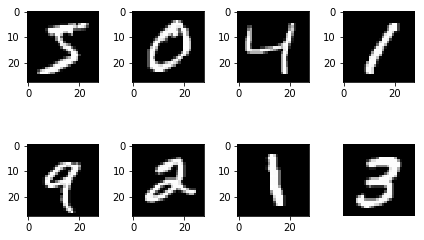

In [8]:
ROW = 2
COLUMN = 4
for i in range(ROW * COLUMN):
    # train[i][0] is i-th image data with size 28x28
    image = training_data[i][0].reshape(28, 28)   
    plt.subplot(ROW, COLUMN, i+1)          
    plt.imshow(image, cmap='gray')  # cmap='gray' is for black and white picture.
plt.axis('off')  # do not show axis value
plt.tight_layout()   # automatic padding between subplots
plt.show()

<b>Part 1</b>: Creating the Neural Networks

The input layer of the neural network contains neurons encoding the values of the input pixels. The training data for the network will consist of many 28 by 28 pixel images of scanned handwritten digits, and so the input layer contains 784=28×28 neurons. The second layer of the network is a hidden layer, we set the neuron number in the hidden layer to 30. The output layer contains 10 neurons. 
<br><br>
<div class="alert alert-warning"><b>Question 2.1.1</b>: Create the network described above using the NeuralNetwork class</div>

In [9]:
#create the network
from NeuralNetwork import * 
my_mnist_net = NeuralNetwork(input_layer_size=784, hidden_layer_size=30, output_layer_size=10)

<div class="alert alert-warning"><b>Question 2.1.2</b>: Add the information about the performance of the neural network on the test set at each epoch</div>

In [10]:
test_accuracy=my_mnist_net.predict(test_data)/100
print('Test_Accuracy  %-2.2f' % test_accuracy)

Test_Accuracy  8.79


<div class="alert alert-warning"><b>Question 2.1.3</b>: Train the Neural Network and comment your findings</div>

In [11]:
#train your network 
(training_accuracy_lr01, error_lr01, validation_accuracy_lr01) = my_mnist_net.train(training_data, validation_data)

#save your model in Models/ using a distinguishing name for your model (architecture, learning rate, etc...)
my_mnist_net.save("Models/model_" + "784_30_10_01.model")

Iteration:  1/50[=====] -Error: 0.1655674548  -Training_Accuracy:  88.06  -Validation_accuracy: 89.04 -time: 23.43 
Iteration:  2/50[=====] -Error: 0.0900181135  -Training_Accuracy:  90.54  -Validation_accuracy: 90.79 -time: 45.44 
Iteration:  3/50[=====] -Error: 0.0745799926  -Training_Accuracy:  91.95  -Validation_accuracy: 91.58 -time: 66.34 
Iteration:  4/50[=====] -Error: 0.0662253743  -Training_Accuracy:  92.61  -Validation_accuracy: 92.36 -time: 86.71 
Iteration:  5/50[=====] -Error: 0.0609684985  -Training_Accuracy:  93.30  -Validation_accuracy: 92.66 -time: 106.35 
Iteration:  6/50[=====] -Error: 0.0567575099  -Training_Accuracy:  93.59  -Validation_accuracy: 92.82 -time: 125.77 
Iteration:  7/50[=====] -Error: 0.0538454924  -Training_Accuracy:  94.10  -Validation_accuracy: 93.00 -time: 145.25 
Iteration:  8/50[=====] -Error: 0.0511648403  -Training_Accuracy:  94.11  -Validation_accuracy: 92.93 -time: 164.71 
Iteration:  9/50[=====] -Error: 0.0490640124  -Training_Accuracy:  9

<div class="alert alert-success">
As it was predictable, the training accuracy increases as the iterations increase. It was useful to output also the validation accuracy to check that the output was not overfitting: seeing that the validation accuracy, where the network tries to predict a test set never seen before, stays always pretty high (94% approx.), is a proof of that.
</div>

<div class="alert alert-warning"><b>Question 2.1.4</b>: Guess digit, Implement and test a python function that predict the class of a digit (the folder images_test contains some examples of images of digits)</div>


In [12]:
#Your implementation goes here
import os
from scipy import misc

def getTestData(folder):
    data = []
    for imageName in [f for f in os.listdir(folder) if f.endswith(".bmp")]:
        img = misc.imread(folder + imageName, flatten=True)
        img = misc.imresize(img, (28,28))
        img = np.reshape(img, (28*28, 1))
        nr  = int(imageName[0])
        label = np.zeros(10)
        label[nr] = 1
        data.append((img, label))  
    return data

folderData = getTestData("./Images_test/")
print(my_mnist_net.predict(folderData))

1.0


transfer_functions.py:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


<b>Part 2</b>: Change the neural network structure and parameters to optimize performance

<div class="alert alert-warning"><b> Question 2.2.1</b>: Change the learning rate (0.001, 0.1, 1.0 , 10). Train the new neural nets with the original specifications (Part 2.1), for 50 iterations. 
Plot test accuracy vs iteration for each learning rate on the same graph. Report the maximum
test accuracy achieved for each learning rate. Which one achieves the maximum test accuracy?</div>

In [13]:
#Your implementation with a learning rate of 0.001 goes here 
my_mnist_net = NeuralNetwork(input_layer_size=784, hidden_layer_size=30, output_layer_size=10, learning_rate=0.001)

#train network 
(training_accuracy_lr0001, error_lr0001, validation_accuracy_lr0001) = my_mnist_net.train(training_data, validation_data)

#save model in Models/ using a distinguishing name for your model (architecture, learning rate, etc...)
my_mnist_net.save("Models/model_" + "784_30_10_0001.model")

Iteration:  1/50[=====] -Error: 0.4773322932  -Training_Accuracy:  36.79  -Validation_accuracy: 38.93 -time: 19.59 
Iteration:  2/50[=====] -Error: 0.3874132874  -Training_Accuracy:  50.48  -Validation_accuracy: 53.04 -time: 39.37 
Iteration:  3/50[=====] -Error: 0.3551427673  -Training_Accuracy:  57.11  -Validation_accuracy: 59.71 -time: 58.74 
Iteration:  4/50[=====] -Error: 0.3296181350  -Training_Accuracy:  61.04  -Validation_accuracy: 63.36 -time: 78.07 
Iteration:  5/50[=====] -Error: 0.3087908541  -Training_Accuracy:  64.08  -Validation_accuracy: 66.64 -time: 97.43 
Iteration:  6/50[=====] -Error: 0.2914079352  -Training_Accuracy:  65.88  -Validation_accuracy: 68.43 -time: 116.87 
Iteration:  7/50[=====] -Error: 0.2766976428  -Training_Accuracy:  67.41  -Validation_accuracy: 69.76 -time: 136.26 
Iteration:  8/50[=====] -Error: 0.2640861550  -Training_Accuracy:  69.03  -Validation_accuracy: 71.30 -time: 156.00 
Iteration:  9/50[=====] -Error: 0.2530938274  -Training_Accuracy:  70

In [14]:
#Your implementation with a learning rate of 1.0 goes here 
my_mnist_net = NeuralNetwork(input_layer_size=784, hidden_layer_size=30, output_layer_size=10, learning_rate=1.0)

#train network 
(training_accuracy_lr1, error_lr1, validation_accuracy_lr1) = my_mnist_net.train(training_data, validation_data)

#save model in Models/ using a distinguishing name for your model (architecture, learning rate, etc...)
my_mnist_net.save("Models/model_" + "784_30_10_1.model")

Iteration:  1/50[=====] -Error: 0.1038293976  -Training_Accuracy:  90.99  -Validation_accuracy: 90.94 -time: 18.95 
Iteration:  2/50[=====] -Error: 0.0690076682  -Training_Accuracy:  91.90  -Validation_accuracy: 91.73 -time: 38.09 
Iteration:  3/50[=====] -Error: 0.0613812655  -Training_Accuracy:  93.60  -Validation_accuracy: 93.12 -time: 56.99 
Iteration:  4/50[=====] -Error: 0.0569077377  -Training_Accuracy:  93.78  -Validation_accuracy: 93.74 -time: 76.03 
Iteration:  5/50[=====] -Error: 0.0556669564  -Training_Accuracy:  93.95  -Validation_accuracy: 93.68 -time: 94.89 
Iteration:  6/50[=====] -Error: 0.0533246212  -Training_Accuracy:  93.76  -Validation_accuracy: 93.15 -time: 113.85 
Iteration:  7/50[=====] -Error: 0.0513746651  -Training_Accuracy:  94.35  -Validation_accuracy: 93.92 -time: 133.07 
Iteration:  8/50[=====] -Error: 0.0491922504  -Training_Accuracy:  94.37  -Validation_accuracy: 94.35 -time: 152.59 
Iteration:  9/50[=====] -Error: 0.0485510959  -Training_Accuracy:  94

In [15]:
#Your implementation with a learning rate of 10 goes here 
my_mnist_net = NeuralNetwork(input_layer_size=784, hidden_layer_size=30, output_layer_size=10, learning_rate=10)

#train network 
(training_accuracy_lr10, error_lr10, validation_accuracy_lr10) = my_mnist_net.train(training_data, validation_data)

#save model in Models/ using a distinguishing name for your model (architecture, learning rate, etc...)
my_mnist_net.save("Models/model_" + "784_30_10_ten.model")

Iteration:  1/50[=====] -Error: 0.5097681235  -Training_Accuracy:  13.40  -Validation_accuracy: 13.99 -time: 19.06 
Iteration:  2/50[=====] -Error: 0.5006492167  -Training_Accuracy:  23.90  -Validation_accuracy: 23.82 -time: 38.23 
Iteration:  3/50[=====] -Error: 0.5001575335  -Training_Accuracy:  14.39  -Validation_accuracy: 15.17 -time: 57.27 
Iteration:  4/50[=====] -Error: 0.4950397791  -Training_Accuracy:  10.05  -Validation_accuracy: 10.17 -time: 76.44 
Iteration:  5/50[=====] -Error: 0.5075202574  -Training_Accuracy:  10.18  -Validation_accuracy: 10.20 -time: 95.77 
Iteration:  6/50[=====] -Error: 0.4999543985  -Training_Accuracy:  14.52  -Validation_accuracy: 14.47 -time: 115.25 
Iteration:  7/50[=====] -Error: 0.4993221957  -Training_Accuracy:  12.63  -Validation_accuracy: 12.54 -time: 134.32 
Iteration:  8/50[=====] -Error: 0.5013388081  -Training_Accuracy:  9.78  -Validation_accuracy: 9.51 -time: 153.47 
Iteration:  9/50[=====] -Error: 0.4999214395  -Training_Accuracy:  15.6

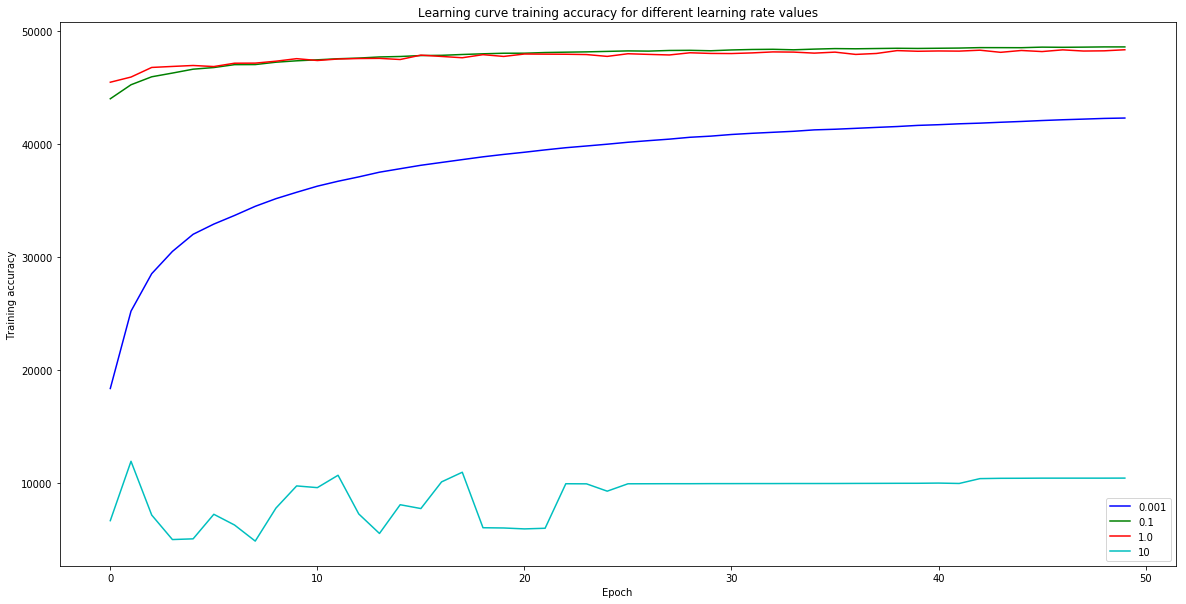

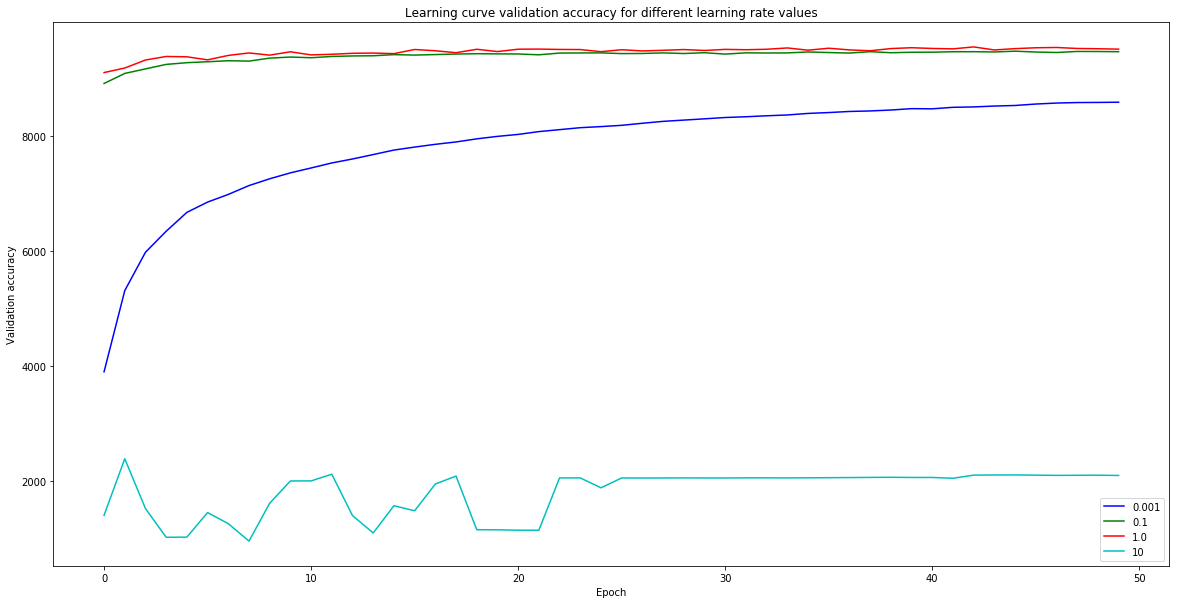

In [16]:
#plotting all learning rate training accuracy against each other
fig = plt.figure(figsize=(20,10))
#learning rate = 0.001
x = np.arange(len(training_accuracy_lr0001))
plt.plot(x, training_accuracy_lr0001, "b-", label="0.001")
#learning rate = 0.1
x = np.arange(len(training_accuracy_lr01))
plt.plot(x, training_accuracy_lr01, "g-", label="0.1")
#learning rate = 1.0
x = np.arange(len(training_accuracy_lr1))
plt.plot(x, training_accuracy_lr1, "r-", label="1.0")
#learning rate = 10
x = np.arange(len(training_accuracy_lr10))
plt.plot(x, training_accuracy_lr10, "c-", label="10")

plt.xlabel("Epoch")
plt.ylabel("Training accuracy")
plt.legend()
plt.title("Learning curve training accuracy for different learning rate values")
plt.show()

#plotting all learning rate errors against each other
fig = plt.figure(figsize=(20,10))
#learning rate = 0.001
x = np.arange(len(error_lr0001))
plt.plot(x, validation_accuracy_lr0001, "b-", label="0.001")
#learning rate = 0.1
x = np.arange(len(error_lr01))
plt.plot(x, validation_accuracy_lr01, "g-", label="0.1")
#learning rate = 1.0
x = np.arange(len(error_lr1))
plt.plot(x, validation_accuracy_lr1, "r-", label="1.0")
#learning rate = 10
x = np.arange(len(error_lr10))
plt.plot(x, validation_accuracy_lr10, "c-", label="10")

plt.xlabel("Epoch")
plt.ylabel("Validation accuracy")
plt.legend()
plt.title("Learning curve validation accuracy for different learning rate values")
plt.show()

<div class="alert alert-success">
The learning rate is the parameter that controls the equation to update weights for the backpropagation.
In the two previous plots we have the results of the network trained with different learning rates.
In the first plot, we can clearly see that a high learning rate, such as <i>10</i> in the example above, is useless and doesn't improve anything: infact, the steps taken to update weights are so long that pass over the minimum.
On the other hand, the other three lines represent the "smaller" learning rate networks. We can see that they all perform pretty well but for the network with <i>0.001</i> learning rate, the update is so small that in 50 iterations it doesn't even manage to converge to the best network. <i>0.1</i> learning rate parameter is clearly the one that fits the best.
In the second plot instead, we plot the validation accuracy for the different networks.
</div>

<div class="alert alert-warning"><b> Question 2.2.2 : </b> initialize all weights to 0.  Plot the training accuracy curve.
Comment your results</div>
    
        

In [17]:
#Your implementation goes here
my_mnist_net_0weights = NeuralNetwork(input_layer_size=784, hidden_layer_size=30, output_layer_size=10)
#we set all weight to zero
my_mnist_net_0weights.weights_initialisation(wi=np.zeros((28*28+1, 30)), wo=np.zeros((30+1,10)))

#we train the network
(training_accuracy_0weights, error_0weights, validation_accuracy_0weights) = my_mnist_net_0weights.train(training_data, validation_data)

Iteration:  1/50[=====] -Error: 0.4073069767  -Training_Accuracy:  29.74  -Validation_accuracy: 29.95 -time: 20.35 
Iteration:  2/50[=====] -Error: 0.3715006256  -Training_Accuracy:  32.62  -Validation_accuracy: 33.13 -time: 40.58 
Iteration:  3/50[=====] -Error: 0.3699764234  -Training_Accuracy:  32.35  -Validation_accuracy: 32.96 -time: 60.15 
Iteration:  4/50[=====] -Error: 0.3693853541  -Training_Accuracy:  30.59  -Validation_accuracy: 30.63 -time: 79.04 
Iteration:  5/50[=====] -Error: 0.3690137530  -Training_Accuracy:  30.03  -Validation_accuracy: 30.30 -time: 97.83 
Iteration:  6/50[=====] -Error: 0.3687680904  -Training_Accuracy:  29.53  -Validation_accuracy: 29.99 -time: 116.67 
Iteration:  7/50[=====] -Error: 0.3685206929  -Training_Accuracy:  33.59  -Validation_accuracy: 34.40 -time: 135.58 
Iteration:  8/50[=====] -Error: 0.3682609651  -Training_Accuracy:  33.46  -Validation_accuracy: 33.33 -time: 154.59 
Iteration:  9/50[=====] -Error: 0.3682452203  -Training_Accuracy:  34

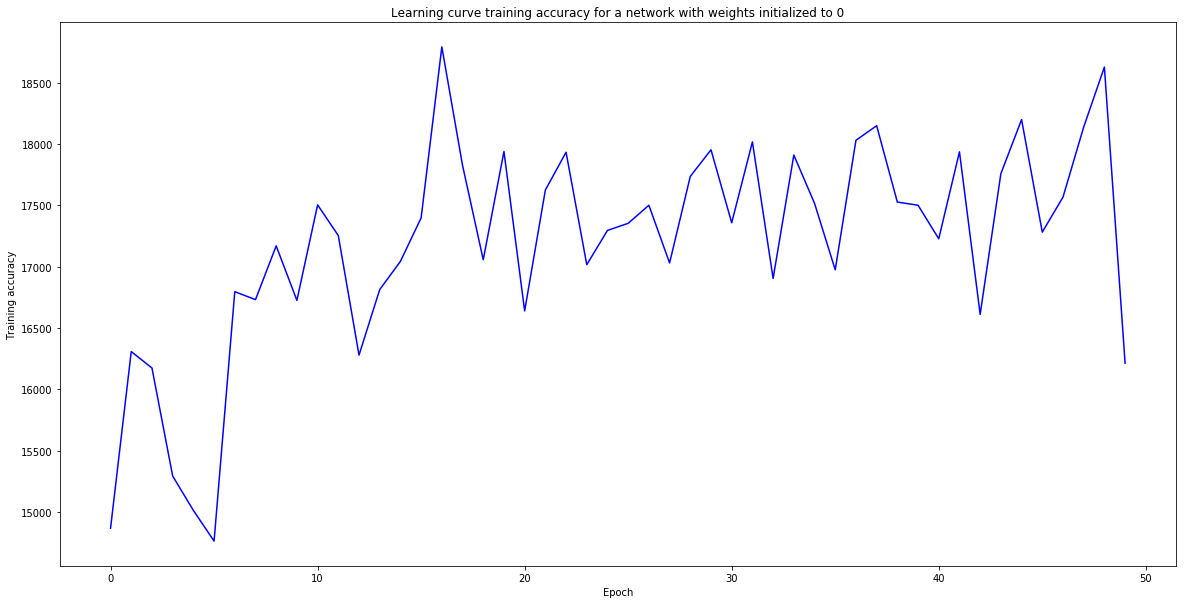

In [18]:
#we plot the training accuracy curve
fig = plt.figure(figsize=(20,10))
x = np.arange(len(training_accuracy_0weights))
plt.plot(x, training_accuracy_0weights, "b-")
plt.xlabel("Epoch")
plt.ylabel("Training accuracy")
plt.title("Learning curve training accuracy for a network with weights initialized to 0")
plt.show()

<div class="alert alert-success">
As it was derivable through the mathematics, a network with all weights initialized to 0 will not work. <b><i> But why?</i></b>
<br><br>
With all $w^{(l)}_{ij} = 0$ for all $l$, $i$ and $j$ all activations of the hidden layer $u^{(1)}_{i}$ will be equal and so all the outputs $o^{(1)}_{i}$ and the same is for all the other layers. Because of this, during backpropagation, all computations of $\frac{\partial{E}}{\partial{u^{(l)}_{i}}}$, since all $w^{(l)}_{ij}$ are equal and all $o^{(l)}_{i}$ are equal too, will be equal and so, after backpropagations all weights will continue to remain equal. <br><br><i>What does this mean?</i> That symmetric weights prevent the network from learning, as it can be seen by the plot above, and a randomisation of weight will allow us to break the symmetry and improve the network after every iteration.
</div>

<div class="alert alert-warning"><b> Question 2.2.3 : </b> Try with a different transfer function (such as tanh).
 File transfer_functions.py provides you the python implementation of the tanh function and its derivative</div>

In [19]:
#Your implementation goes here
#we implemented a .setTransferFunction function that allows to set the transfer function and its derivative

my_mnist_net_tanh = NeuralNetwork(input_layer_size=784, hidden_layer_size=30, output_layer_size=10)

my_mnist_net_tanh.set_transfer_function(tanh, dtanh)

#we train the network
(training_accuracy_tanh, error_tanh, validation_accuracy_tanh) = my_mnist_net_tanh.train(training_data, validation_data)

Iteration:  1/50[=====] -Error: 1.2585347961  -Training_Accuracy:  44.30  -Validation_accuracy: 44.49 -time: 16.55 
Iteration:  2/50[=====] -Error: 1.0370728716  -Training_Accuracy:  68.56  -Validation_accuracy: 68.57 -time: 33.06 
Iteration:  3/50[=====] -Error: 0.9874778598  -Training_Accuracy:  61.52  -Validation_accuracy: 61.79 -time: 49.85 
Iteration:  4/50[=====] -Error: 0.9607424728  -Training_Accuracy:  79.62  -Validation_accuracy: 80.16 -time: 66.26 
Iteration:  5/50[=====] -Error: 0.9393153834  -Training_Accuracy:  62.18  -Validation_accuracy: 62.53 -time: 82.67 
Iteration:  6/50[=====] -Error: 0.9294458773  -Training_Accuracy:  77.17  -Validation_accuracy: 78.01 -time: 99.11 
Iteration:  7/50[=====] -Error: 0.9234212574  -Training_Accuracy:  77.72  -Validation_accuracy: 77.89 -time: 115.57 
Iteration:  8/50[=====] -Error: 0.9193456946  -Training_Accuracy:  86.67  -Validation_accuracy: 87.31 -time: 132.06 
Iteration:  9/50[=====] -Error: 0.9065492064  -Training_Accuracy:  83.

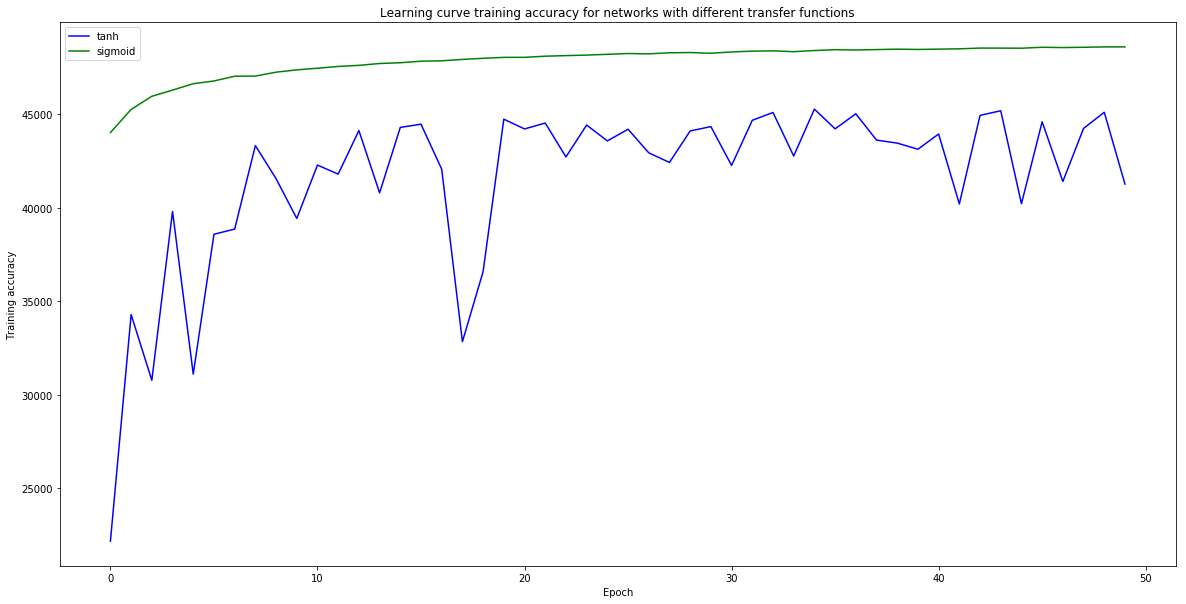

In [20]:
#we plot the training accuracy curve
fig = plt.figure(figsize=(20,10))
x = np.arange(len(training_accuracy_tanh))
plt.plot(x, training_accuracy_tanh, "b-", label="tanh")
#we plot it against the same network with sigmoid as transfer function
x = np.arange(len(training_accuracy_lr01))
plt.plot(x, training_accuracy_lr01, "g-", label="sigmoid")
plt.xlabel("Epoch")
plt.ylabel("Training accuracy")
plt.legend()
plt.title("Learning curve training accuracy for networks with different transfer functions")
plt.show()

<div class="alert alert-success">
#Your answer goes here
<br>
##WHY THE FUCK TANH WORKS THIS BADLY WRT SIGMOID TRANSFER FUNCTION
</div>

<div class="alert alert-warning"><b> Question 2.2.4 : </b>  Add more neurons in the hidden layer (try with 100, 200, 300). Plot the curve representing the validation accuracy versus the number of neurons in the hidden layer.  (Choose and justify other hyper-parameters)</div>

In [21]:
#Your implementation goes here
my_mnist_net_100 = NeuralNetwork(input_layer_size=784, hidden_layer_size=100, output_layer_size=10)
(training_accuracy_100, error_100, validation_accuracy_100) = my_mnist_net_100.train(training_data, validation_data)

Iteration:  1/50[=====] -Error: 0.1301964059  -Training_Accuracy:  89.90  -Validation_accuracy: 90.69 -time: 33.18 
Iteration:  2/50[=====] -Error: 0.0806065567  -Training_Accuracy:  92.20  -Validation_accuracy: 92.26 -time: 66.21 
Iteration:  3/50[=====] -Error: 0.0654353414  -Training_Accuracy:  93.55  -Validation_accuracy: 93.21 -time: 98.37 
Iteration:  4/50[=====] -Error: 0.0565537353  -Training_Accuracy:  94.24  -Validation_accuracy: 93.79 -time: 131.15 
Iteration:  5/50[=====] -Error: 0.0503746377  -Training_Accuracy:  94.98  -Validation_accuracy: 94.18 -time: 164.36 
Iteration:  6/50[=====] -Error: 0.0459506532  -Training_Accuracy:  95.49  -Validation_accuracy: 94.62 -time: 196.67 
Iteration:  7/50[=====] -Error: 0.0421790213  -Training_Accuracy:  95.64  -Validation_accuracy: 94.61 -time: 228.83 
Iteration:  8/50[=====] -Error: 0.0390793081  -Training_Accuracy:  95.92  -Validation_accuracy: 94.86 -time: 261.05 
Iteration:  9/50[=====] -Error: 0.0365432097  -Training_Accuracy:  

In [22]:
my_mnist_net_200 = NeuralNetwork(input_layer_size=784, hidden_layer_size=200, output_layer_size=10)
(training_accuracy_200, error_200, validation_accuracy_200) = my_mnist_net_200.train(training_data, validation_data)

Iteration:  1/50[=====] -Error: 0.1153671928  -Training_Accuracy:  91.49  -Validation_accuracy: 91.58 -time: 60.42 
Iteration:  2/50[=====] -Error: 0.0756445934  -Training_Accuracy:  92.96  -Validation_accuracy: 92.48 -time: 121.33 
Iteration:  3/50[=====] -Error: 0.0619392327  -Training_Accuracy:  93.51  -Validation_accuracy: 93.04 -time: 184.42 
Iteration:  4/50[=====] -Error: 0.0534895279  -Training_Accuracy:  94.84  -Validation_accuracy: 93.91 -time: 246.11 
Iteration:  5/50[=====] -Error: 0.0472235101  -Training_Accuracy:  95.30  -Validation_accuracy: 94.46 -time: 306.79 
Iteration:  6/50[=====] -Error: 0.0423587117  -Training_Accuracy:  95.71  -Validation_accuracy: 94.40 -time: 367.50 
Iteration:  7/50[=====] -Error: 0.0383427551  -Training_Accuracy:  96.23  -Validation_accuracy: 94.80 -time: 427.96 
Iteration:  8/50[=====] -Error: 0.0350600328  -Training_Accuracy:  96.40  -Validation_accuracy: 94.72 -time: 489.30 
Iteration:  9/50[=====] -Error: 0.0322987861  -Training_Accuracy:

In [23]:
my_mnist_net_300 = NeuralNetwork(input_layer_size=784, hidden_layer_size=300, output_layer_size=10)
(training_accuracy_300, error_300, validation_accuracy_300) = my_mnist_net_300.train(training_data, validation_data)

Iteration:  1/50[=====] -Error: 0.1111147949  -Training_Accuracy:  91.19  -Validation_accuracy: 91.36 -time: 155.84 
Iteration:  2/50[=====] -Error: 0.0744595501  -Training_Accuracy:  92.98  -Validation_accuracy: 92.82 -time: 311.37 
Iteration:  3/50[=====] -Error: 0.0606830512  -Training_Accuracy:  94.46  -Validation_accuracy: 94.14 -time: 468.05 
Iteration:  4/50[=====] -Error: 0.0515781422  -Training_Accuracy:  95.17  -Validation_accuracy: 94.44 -time: 623.36 
Iteration:  5/50[=====] -Error: 0.0450606925  -Training_Accuracy:  95.81  -Validation_accuracy: 94.81 -time: 779.17 
Iteration:  6/50[=====] -Error: 0.0399192600  -Training_Accuracy:  95.98  -Validation_accuracy: 94.86 -time: 934.76 
Iteration:  7/50[=====] -Error: 0.0361501078  -Training_Accuracy:  96.42  -Validation_accuracy: 95.04 -time: 1090.53 
Iteration:  8/50[=====] -Error: 0.0327387344  -Training_Accuracy:  96.76  -Validation_accuracy: 95.25 -time: 1246.07 
Iteration:  9/50[=====] -Error: 0.0299248469  -Training_Accura

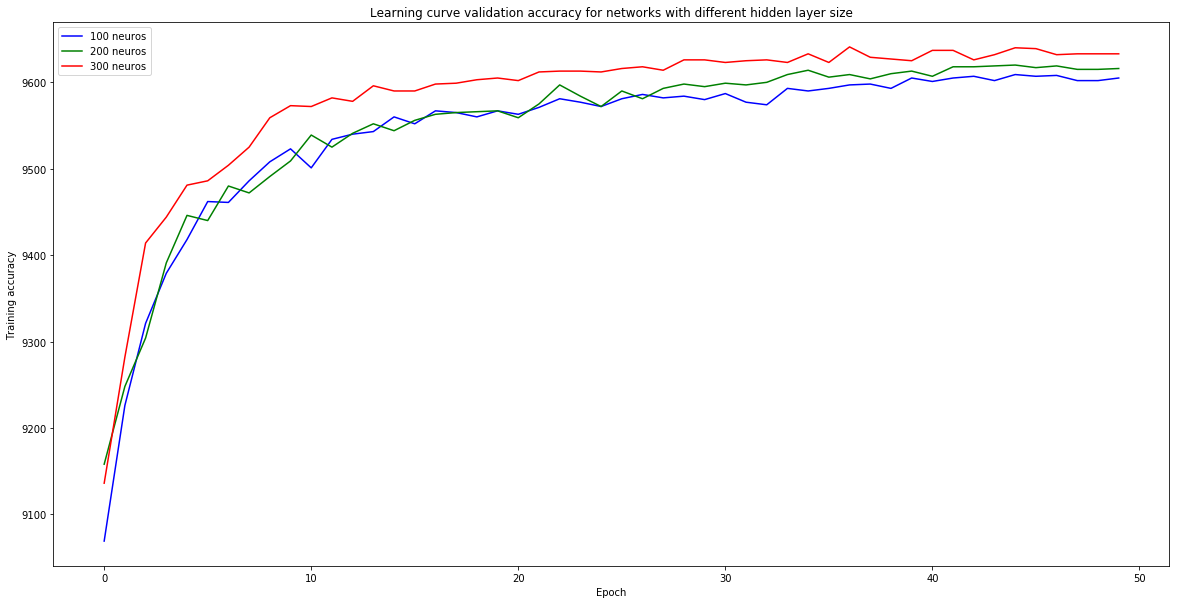

In [36]:
#we plot the training accuracy curve
fig = plt.figure(figsize=(20,10))
x = np.arange(len(validation_accuracy_100))
plt.plot(x, validation_accuracy_100, "b-", label="100 neuros")
x = np.arange(len(validation_accuracy_200))
plt.plot(x, validation_accuracy_200, "g-", label="200 neuros")
x = np.arange(len(validation_accuracy_300))
plt.plot(x, validation_accuracy_300, "r-", label="300 neuros")
plt.xlabel("Epoch")
plt.ylabel("Training accuracy")
plt.legend()
plt.title("Learning curve validation accuracy for networks with different hidden layer size")
plt.show()

<div class="alert alert-success">
#Your answer goes here
<br>
TODO
<br>
overfitting maybe?
</div>

<div class="alert alert-warning"><b> Question 2.2.5 : </b> Add one additional hidden layers and train your network, discuss your results with different setting.</div>

In [26]:
#Your implementation goes here
import NeuralNetwork2
my_mnist_net_2hidden = NeuralNetwork2.NeuralNetwork(input_layer_size=784,\
                                                    hidden1_layer_size=30,\
                                                    hidden2_layer_size=30,\
                                                    output_layer_size=10)

(training_accuracy_2hidden, error_2hidden, validation_accuracy_2hidden) = my_mnist_net_2hidden.train(training_data, validation_data)

Iteration:  1/50[=====] -Error: 0.2359660606  -Training_Accuracy:  86.35  -Validation_accuracy: 87.01 -time: 32.42 
Iteration:  2/50[=====] -Error: 0.0922193203  -Training_Accuracy:  90.50  -Validation_accuracy: 90.44 -time: 66.44 
Iteration:  3/50[=====] -Error: 0.0709618445  -Training_Accuracy:  92.07  -Validation_accuracy: 91.63 -time: 92.05 
Iteration:  4/50[=====] -Error: 0.0612178867  -Training_Accuracy:  93.19  -Validation_accuracy: 92.23 -time: 119.76 
Iteration:  5/50[=====] -Error: 0.0549656323  -Training_Accuracy:  93.81  -Validation_accuracy: 92.66 -time: 147.58 
Iteration:  6/50[=====] -Error: 0.0502838636  -Training_Accuracy:  94.31  -Validation_accuracy: 92.99 -time: 177.81 
Iteration:  7/50[=====] -Error: 0.0469793775  -Training_Accuracy:  94.67  -Validation_accuracy: 93.32 -time: 208.20 
Iteration:  8/50[=====] -Error: 0.0442325557  -Training_Accuracy:  95.14  -Validation_accuracy: 93.65 -time: 235.20 
Iteration:  9/50[=====] -Error: 0.0415521850  -Training_Accuracy:  

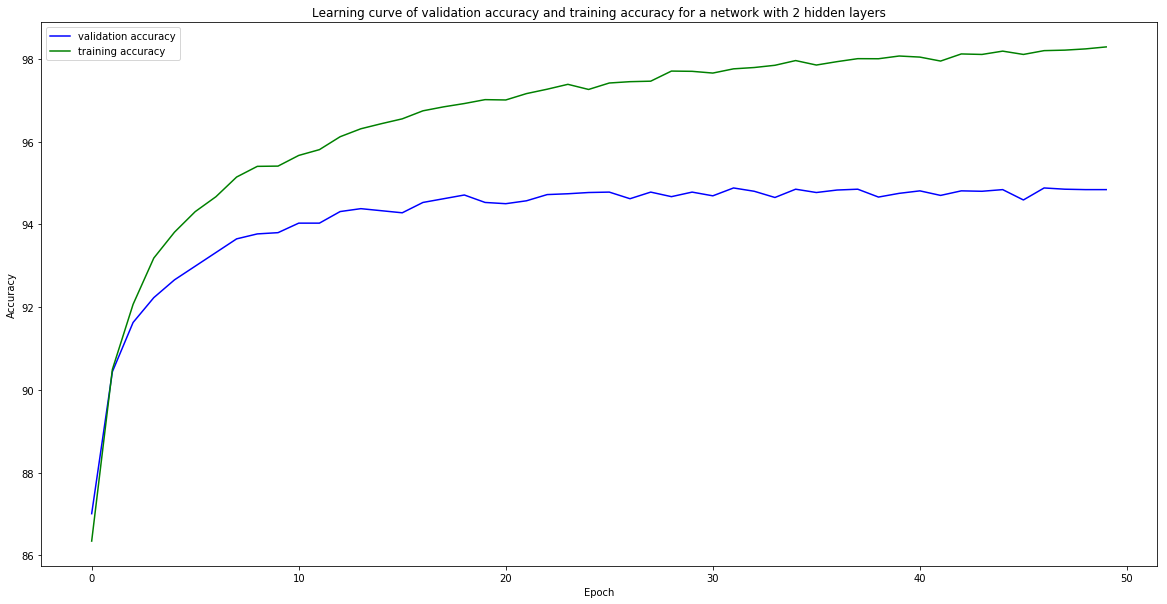

In [34]:
#we plot the training accuracy and validation accuracy curve
fig = plt.figure(figsize=(20,10))
x = np.arange(len(validation_accuracy_2hidden))
y=[z/100 for z in validation_accuracy_2hidden]
plt.plot(x, y, "b-", label="validation accuracy")
x = np.arange(len(training_accuracy_2hidden))
y=[z/500 for z in training_accuracy_2hidden]
plt.plot(x, y, "g-", label="training accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Learning curve of validation accuracy and training accuracy for a network with 2 hidden layers")
plt.show()

<div class="alert alert-success">
#Your answer goes here
</div>